## IMDB Movies India

# Import Libraries

In [1]:
# Importing Libraries for Time Series Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Importing Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.base import clone
from sklearn.feature_selection import SelectKBest, f_regression


# For feature engineering and model evaluation
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score

# For seasonal decomposition and plots
from matplotlib import dates as mdates
import matplotlib.ticker as ticker

# Other libraries
import warnings
warnings.filterwarnings('ignore')# For feature engineering and model evaluation
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score

# For seasonal decomposition and plots
from matplotlib import dates as mdates
import matplotlib.ticker as ticker

# Other libraries
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
IMDB_data = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
print(IMDB_data)

                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           A

# Dimension of Dataset

In [4]:
IMDB_data.shape

(15509, 10)

In [5]:
IMDB_data.info

<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes

In [43]:
IMDB_data.describe(include='all')

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,6813,6813,6813,6813.000000,6813.000000,6813,6813,6813,6813
unique,6813,92,398,NaN,NaN,2845,2315,2681,2893
top,#Gadhvi (He thought he was Gandhi),2019,Drama,NaN,NaN,Hrishikesh Mukherjee,Jeetendra,Rekha,Pran
freq,1,226,1030,NaN,NaN,39,124,65,64
mean,NaN,NaN,NaN,5.820065,2107.025099,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.375330,12378.151829,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,4.900000,18.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,6.000000,64.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.800000,500.000000,NaN,NaN,NaN,NaN


# Find Is there any null value in dataset or not

In [7]:
IMDB_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
IMDB_data.drop_duplicates(subset='Name',inplace=True)
IMDB_data.duplicated().value_counts()

False    13838
dtype: int64

In [9]:
IMDB_data = IMDB_data.drop(IMDB_data.index[0]).reset_index(drop=True)
IMDB_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


from matplotlib import pyplot as plt
_df_110['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_111['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_112.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_113.groupby('Year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_114.groupby('Duration').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_115.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_116.plot(kind='scatter', x='index', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_117.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_118.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_119.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Duration')):
  _plot_series(series, series_name, i)
  fig.legend(title='Duration', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_120.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
_df_121['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_122['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Year'].value_counts()
    for x_label, grp in _df_123.groupby('Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Name')
_ = plt.ylabel('Year')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Duration'].value_counts()
    for x_label, grp in _df_124.groupby('Year')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Year')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Genre'].value_counts()
    for x_label, grp in _df_125.groupby('Duration')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Duration')
_ = plt.ylabel('Genre')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Votes'].value_counts()
    for x_label, grp in _df_126.groupby('Genre')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Genre')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_127['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_127, x='index', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_128['Year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_128, x='index', y='Year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_129['Duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_129, x='index', y='Duration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_130['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_130, x='index', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [10]:
IMDB_data.isnull().sum().sort_values(ascending=False)/len(IMDB_data)

Duration    0.523090
Rating      0.483053
Votes       0.482980
Actor 3     0.202717
Actor 2     0.154080
Genre       0.114909
Actor 1     0.103997
Year        0.035918
Director    0.033606
Name        0.000000
dtype: float64

In [11]:
print("Number of rows:", IMDB_data.shape[0])
print("Number of columns:", IMDB_data.shape[1])

Number of rows: 13837
Number of columns: 10


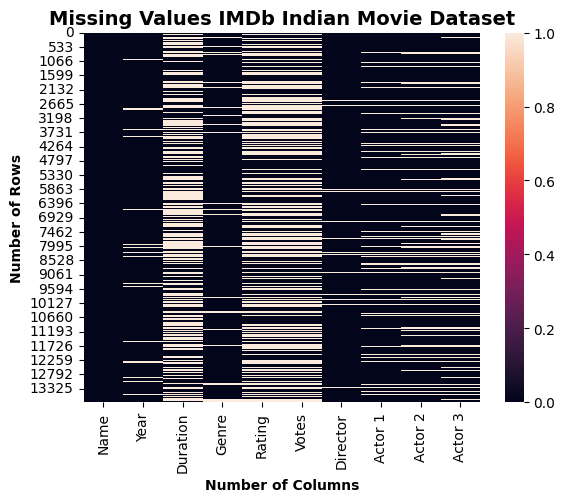

In [12]:
sns.heatmap(IMDB_data.isnull())

# Plot Title
plt.title("Missing Values IMDb Indian Movie Dataset",
          fontsize=14,
          fontweight='bold')

# Title for x and y-axis labels with formatting
plt.xlabel("Number of Columns",
           fontweight='bold')
plt.ylabel("Number of Rows",
           fontweight='bold')
plt.show()

In [13]:
IMDB_data.drop_duplicates(inplace=True)
IMDB_data.shape

(13837, 10)

In [14]:
IMDB_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


from matplotlib import pyplot as plt
_df_71['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_72['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_73.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_74.groupby('Year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_75.groupby('Duration').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_76.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_77.plot(kind='scatter', x='index', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_78.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_79.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_80.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Duration')):
  _plot_series(series, series_name, i)
  fig.legend(title='Duration', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_81.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
_df_82['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_83['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Year'].value_counts()
    for x_label, grp in _df_84.groupby('Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Name')
_ = plt.ylabel('Year')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Duration'].value_counts()
    for x_label, grp in _df_85.groupby('Year')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Year')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Genre'].value_counts()
    for x_label, grp in _df_86.groupby('Duration')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Duration')
_ = plt.ylabel('Genre')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Votes'].value_counts()
    for x_label, grp in _df_87.groupby('Genre')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Genre')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_88['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_88, x='index', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_89['Year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_89, x='index', y='Year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_90['Duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_90, x='index', y='Duration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_91['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_91, x='index', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [15]:
IMDB_data.isnull().sum()

Name           0
Year         497
Duration    7238
Genre       1590
Rating      6684
Votes       6683
Director     465
Actor 1     1439
Actor 2     2132
Actor 3     2805
dtype: int64

In [16]:
miss_count = IMDB_data.isnull().sum().sort_values(ascending=False)
miss_percent = (round(IMDB_data.isnull().sum()/IMDB_data.isnull().count(), 4)*100).sort_values(ascending=False)
miss_data = pd.concat([miss_count, miss_percent],
                       axis=1,
                       keys=['miss_count', 'miss_percent'])
miss_data

,miss_count,miss_percent
Duration,7238,52.31
Rating,6684,48.31
Votes,6683,48.30
Actor 3,2805,20.27
Actor 2,2132,15.41
Genre,1590,11.49
Actor 1,1439,10.40
Year,497,3.59
Director,465,3.36
Name,0,0.00


from matplotlib import pyplot as plt
_df_66['miss_count'].plot(kind='hist', bins=20, title='miss_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67['miss_percent'].plot(kind='hist', bins=20, title='miss_percent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_68.plot(kind='scatter', x='miss_count', y='miss_percent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_69['miss_count'].plot(kind='line', figsize=(8, 4), title='miss_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_70['miss_percent'].plot(kind='line', figsize=(8, 4), title='miss_percent')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
IMDB_data.dropna(subset=['Rating'], inplace=True)
(round(IMDB_data.isnull().sum()/IMDB_data.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    25.43
Actor 3      3.89
Actor 2      2.66
Actor 1      1.66
Genre        1.20
Director     0.04
Name         0.00
Year         0.00
Rating       0.00
Votes        0.00
dtype: float64

In [18]:
IMDB_data.isnull().sum()

Name           0
Year           0
Duration    1819
Genre         86
Rating         0
Votes          0
Director       3
Actor 1      119
Actor 2      190
Actor 3      278
dtype: int64

In [19]:
IMDB_data.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(IMDB_data.isnull().sum()/IMDB_data.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    24.44
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [20]:
IMDB_data['Duration'] = IMDB_data['Duration'].astype(str)
IMDB_data['Duration'] = pd.to_numeric(IMDB_data['Duration'].str.replace(' min', ''), errors='coerce')
IMDB_data['Duration'].fillna(IMDB_data['Duration'].mean(),
                         inplace=True)

IMDB_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [21]:
IMDB_data.shape

(6813, 10)

In [22]:
IMDB_data['Year'] = IMDB_data['Year'].apply(lambda x: x.split(')')[0])

year_1 = []
for val in IMDB_data['Year']:
    if len(val.split('(')) == 1:
        year_1.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_1.append(val.split('(')[1])
IMDB_data['Year'] = year_1

In [23]:
# Check the data type of the 'Votes' column
print(IMDB_data['Votes'].dtype)

# If it's not already a string, convert it to string with commas
IMDB_data['Votes'] = IMDB_data['Votes'].astype(str)

# Replace commas and convert to int
IMDB_data['Votes'] = IMDB_data['Votes'].str.replace(',', '').astype(int)

# Check the data type after conversion
print(IMDB_data['Votes'].dtype)

object
int64


In [24]:
IMDB_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6813 entries, 0 to 13836
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6813 non-null   object 
 1   Year      6813 non-null   object 
 2   Duration  6813 non-null   float64
 3   Genre     6813 non-null   object 
 4   Rating    6813 non-null   float64
 5   Votes     6813 non-null   int64  
 6   Director  6813 non-null   object 
 7   Actor 1   6813 non-null   object 
 8   Actor 2   6813 non-null   object 
 9   Actor 3   6813 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 585.5+ KB


In [25]:
IMDB_data['Year'].unique()

array(['2019', '1997', '2005', '2012', '2014', '2004', '2016', '1991',
       '2018', '2010', '1958', '2017', '2009', '1993', '2002', '1946',
       '2008', '1994', '2007', '2013', '2003', '1998', '1979', '1974',
       '2015', '2006', '1981', '2020', '1985', '2011', '1988', '1995',
       '1987', '2021', '1999', '1973', '1953', '1986', '1982', '1977',
       '1968', '1969', '1948', '1970', '1990', '1989', '1947', '2001',
       '2000', '1971', '1992', '1976', '1984', '1975', '1978', '1980',
       '1966', '1967', '1972', '1964', '1952', '1959', '1951', '1954',
       '1962', '1961', '1957', '1965', '1996', '1956', '1933', '1936',
       '1983', '1955', '1950', '1963', '1949', '1960', '1940', '1945',
       '1938', '1941', '1942', '1935', '1937', '1944', '1931', '1932',
       '1943', '1917', '1939', '1934'], dtype=object)

In [26]:
IMDB_data[['Rating', 'Duration', 'Votes']].describe()

,Rating,Duration,Votes
count,6813.000000,6813.000000,6813.000000
mean,5.820065,132.816434,2107.025099
std,1.375330,22.224326,12378.151829
min,1.100000,21.000000,5.000000
25%,4.900000,123.000000,18.000000
50%,6.000000,132.816434,64.000000
75%,6.800000,144.000000,500.000000
max,10.000000,321.000000,591417.000000


from matplotlib import pyplot as plt
_df_54['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_57.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58.plot(kind='scatter', x='Rating', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59.plot(kind='scatter', x='Duration', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_61['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_62['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_63['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_63, x='Rating', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_64['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_64, x='Duration', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_65['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_65, x='Votes', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

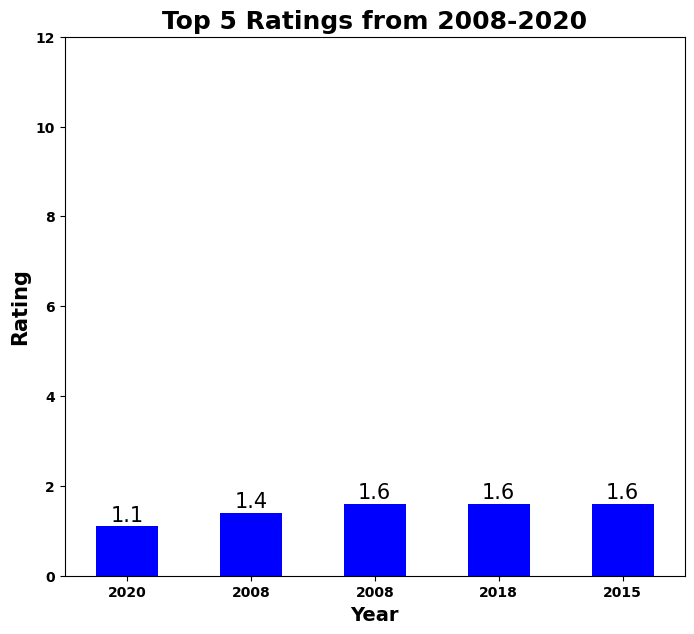

In [27]:
#Plotting Top 5 Rating
top5_rating = IMDB_data[['Year', 'Rating']].sort_values(by = 'Rating',
                                                    ascending = True).head()
bars = top5_rating.plot(kind = 'bar',
                        x = 'Year',
                        y = 'Rating',
                        color = 'blue',
                        legend = None,
                        figsize = (8,7))
plt.xlabel('Year',
           fontsize = 14,
           fontweight = 'bold')
plt.ylabel('Rating',
           fontsize = 15,
           fontweight = 'bold')
plt.title('Top 5 Ratings from 2008-2020',
          fontsize = 18,
          fontweight = 'bold')
plt.xticks(fontweight = 'bold',
           rotation = 0)
plt.yticks(np.arange(0, 13, 2), fontweight='bold')

#Labelling Plot
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.1f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center',
                 va='center',
                 size=15,
                 xytext=(0, 8),
                 textcoords='offset points')

plt.show()

In [28]:
IMDB_data.drop('Duration', axis=1, inplace=True)

In [29]:
IMDB_data[IMDB_data['Votes']>10000]

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
51,2 States,2014,"Comedy, Drama, Romance",6.9,24034,Abhishek Varman,Arjun Kapoor,Alia Bhatt,Amrita Singh
52,2.0,2018,"Action, Sci-Fi",6.2,21938,S. Shankar,Rajinikanth,Akshay Kumar,Amy Jackson
73,3 Idiots,2009,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
169,A Wednesday,2008,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
346,Aamir,2008,"Action, Crime, Drama",7.7,10862,Raj Kumar Gupta,Rajeev Khandelwal,Aishwarya,Vasan Bala
...,...,...,...,...,...,...,...,...,...
13430,When Love Calls,1989,"Drama, Musical, Romance",7.3,11486,Sooraj R. Barjatya,Salman Khan,Bhagyashree,Alok Nath
13614,Yeh Jawaani Hai Deewani,2013,"Drama, Musical, Romance",7.1,39863,Ayan Mukherjee,Ranbir Kapoor,Deepika Padukone,Aditya Roy Kapoor
13666,Yes Boss,1997,"Comedy, Drama, Musical",6.8,12714,Aziz Mirza,Shah Rukh Khan,Juhi Chawla,Aditya Pancholi
13770,Zero,2018,"Comedy, Drama, Romance",5.4,24784,Aanand L. Rai,Shah Rukh Khan,Anushka Sharma,Katrina Kaif


from matplotlib import pyplot as plt
_df_42['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45.plot(kind='scatter', x='index', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46.plot(kind='scatter', x='Rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_47.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_48.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_49.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_50.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
_df_51['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_52['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_53['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

In [30]:
IMDB_data.shape

(6813, 9)

In [31]:
movie_update = IMDB_data.drop(['Name'], axis=1)

In [32]:
movie_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6813 entries, 0 to 13836
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      6813 non-null   object 
 1   Genre     6813 non-null   object 
 2   Rating    6813 non-null   float64
 3   Votes     6813 non-null   int64  
 4   Director  6813 non-null   object 
 5   Actor 1   6813 non-null   object 
 6   Actor 2   6813 non-null   object 
 7   Actor 3   6813 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 479.0+ KB


In [33]:
X = movie_update.drop('Rating', axis=1)
Y = movie_update['Rating']

X.head()

,Year,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2019,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,1997,"Comedy, Drama, Musical",827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,2005,"Drama, Romance, War",1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,2012,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


from matplotlib import pyplot as plt
_df_21['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('Year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_24.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('Director').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_26.groupby('Actor 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='index', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Director')):
  _plot_series(series, series_name, i)
  fig.legend(title='Director', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Actor 1')):
  _plot_series(series, series_name, i)
  fig.legend(title='Actor 1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
_df_32['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Genre'].value_counts()
    for x_label, grp in _df_34.groupby('Year')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Year')
_ = plt.ylabel('Genre')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Director'].value_counts()
    for x_label, grp in _df_35.groupby('Genre')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Genre')
_ = plt.ylabel('Director')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Actor 1'].value_counts()
    for x_label, grp in _df_36.groupby('Director')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Director')
_ = plt.ylabel('Actor 1')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Actor 2'].value_counts()
    for x_label, grp in _df_37.groupby('Actor 1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Actor 1')
_ = plt.ylabel('Actor 2')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['Year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='index', y='Year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='index', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['Director'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='index', y='Director', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41['Actor 1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x='index', y='Actor 1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [34]:
actor1_encoding_map = movie_update.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = movie_update.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = movie_update.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = movie_update.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = movie_update.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [35]:
movie_update['actor1_encoded'] = round(movie_update['Actor 1'].map(actor1_encoding_map['Rating']),1)
movie_update['actor2_encoded'] = round(movie_update['Actor 2'].map(actor2_encoding_map['Rating']),1)
movie_update['actor3_encoded'] = round(movie_update['Actor 3'].map(actor3_encoding_map['Rating']),1)
movie_update['director_encoded'] = round(movie_update['Director'].map(director_encoding_map['Rating']),1)
movie_update['genre_encoded'] = round(movie_update['Genre'].map(genre_encoding_map['Rating']),1)

In [36]:
movie_update.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
movie_update.head()

,Year,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,2019,7.0,8,6.8,7.0,7.0,7.0,6.4
2,2019,4.4,35,5.4,4.4,4.4,4.4,5.7
4,1997,4.7,827,4.9,5.8,5.9,5.3,6.2
5,2005,7.4,1086,5.2,6.0,6.5,7.5,7.4
7,2012,5.6,326,5.6,5.9,5.6,5.6,5.5


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['actor1_encoded'].plot(kind='hist', bins=20, title='actor1_encoded')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Votes', y='actor1_encoded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='actor1_encoded', y='actor2_encoded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['actor1_encoded']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('actor1_encoded')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['actor2_encoded']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('actor2_encoded')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['actor1_encoded'].plot(kind='line', figsize=(8, 4), title='actor1_encoded')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Rating', y='Year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Votes', y='Year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='actor1_encoded', y='Year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [37]:
X= movie_update[['Year', 'Votes', 'genre_encoded', 'director_encoded', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded']]
y= movie_update['Rating']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
#Building Model
#Using Linear Regression
#And Random Forest Regressor
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred= rf.predict(X_test)

In [40]:
#For Linear Regression
print('Mean Squared error:', mean_squared_error(y_test, lr_pred))
print('Mean Absolute error:', mean_absolute_error(y_test, lr_pred))
print('R2 Score', r2_score(y_test, lr_pred))
print('This is the result by using Linear Regression')

Mean Squared error: 0.43564969086690286
Mean Absolute error: 0.4893020620609942
R2 Score 0.7645950603141707
This is the result by using Linear Regression


In [41]:
#For Random Forest Regressor
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))
print('This is the result by using Random Forest Regressor')

Mean squared error:  0.36175274101247257
Mean absolute error:  0.4066412325752019
R2 score:  0.8045255535249728
This is the result by using Random Forest Regressor
